# Simulazione Monte Carlo {#sec-montecarlo-integration}

In [1]:
%run ../../config.py # Import the configuration settings
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cmdstanpy
from cmdstanpy import CmdStanModel
cmdstanpy.utils.get_logger().setLevel(logging.ERROR)

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

## Il Metodo di Monte Carlo

Il Metodo di Monte Carlo è una tecnica computazionale che utilizza la casualità per risolvere problemi complessi, evitando calcoli formali particolarmente complicati, come l'integrazione numerica o la soluzione di equazioni differenziali. Nato durante il Progetto Manhattan negli anni '40, questo metodo prende il nome dal celebre casinò di Monte Carlo, in quanto basato su eventi casuali ripetuti. L'idea fu originariamente concepita da Stanislaw Ulam e sviluppata insieme a John von Neumann, come un modo per simulare problemi matematici complessi attraverso l'uso di numeri casuali.

L'essenza del metodo risiede nella simulazione ripetuta di un fenomeno per ottenere informazioni quantitative su un sistema. Per esempio, se volessimo stimare l'area di una forma irregolare, potremmo inscriverla in un quadrato, lanciare un gran numero di puntine casualmente all'interno del quadrato e contare quante cadono all'interno della forma. Il rapporto tra il numero di puntine all'interno della forma e il totale ci fornisce una stima dell'area. Questo concetto riflette la semplicità del metodo Monte Carlo: utilizzare ripetizioni casuali per ottenere stime statistiche di un fenomeno.

La procedura del Metodo Monte Carlo può essere descritta nel modo seguente.

1. **Definizione del problema**: Il primo passo consiste nel formulare il problema in termini di un esperimento probabilistico. Ad esempio, per simulare il lancio di un dado, il problema diventa la generazione di un numero casuale compreso tra 1 e 6.
2. **Generazione di numeri casuali**: Sebbene i computer non possano generare numeri completamente casuali, utilizzano algoritmi che producono numeri pseudo-casuali, sufficientemente casuali per la maggior parte delle applicazioni pratiche.
3. **Simulazione**: L'esperimento probabilistico viene ripetuto molte volte. Ogni ripetizione rappresenta una simulazione indipendente.
4. **Analisi dei risultati**: Una volta completate le simulazioni, si raccolgono i dati e si procede all'analisi statistica, calcolando medie, varianze e altre statistiche per ottenere stime del risultato cercato.

Il metodo Monte Carlo ha molteplici applicazioni. Uno degli utilizzi più comuni del metodo Monte Carlo è l'approssimazione dell'integrale di una funzione, come nell'esempio dell'approssimazione dell'area di un cerchio inscrivendolo in un quadrato. Anche in ambiti come la teoria delle probabilità, il metodo si è dimostrato efficace, come mostrato nel celebre problema di Monty Hall. In questo contesto, la simulazione permette di stimare parametri come la media e la varianza di variabili casuali, aumentando la precisione con il crescere del numero di simulazioni, secondo la legge dei grandi numeri.

Consideriamo ora una distribuzione continua $p(\theta \mid y)$ con media $\mu$. Se possiamo generare campioni $\theta^{(1)}, \theta^{(2)}, \dots, \theta^{(T)}$ indipendenti da $p(\theta \mid y)$, possiamo stimare il valore atteso teorico di $\theta$ attraverso la media campionaria $\frac{1}{T} \sum_{i=1}^T \theta^{(t)}$. Più è elevato il numero di campioni $T$, maggiore sarà la precisione dell'approssimazione grazie alla Legge Forte dei Grandi Numeri. Allo stesso modo, possiamo stimare la probabilità che una variabile casuale $\theta$ cada in un intervallo specifico $(l, u)$ utilizzando la funzione indicatrice $I(l < \theta < u)$ e calcolando la proporzione di campioni che soddisfano questa condizione.

Sebbene il metodo Monte Carlo sia molto versatile e applicabile a una vasta gamma di problemi, presenta alcuni limiti. In particolare, la generazione di un numero sufficiente di campioni per ottenere stime accurate può richiedere un significativo sforzo computazionale, soprattutto in spazi ad alta dimensionalità. Inoltre, i risultati del metodo sono sempre affetti da un certo grado di incertezza, a causa della natura stessa della casualità.

Un passo avanti per superare alcune di queste limitazioni è rappresentato dai metodi Markov Chain Monte Carlo (MCMC), che migliorano l'efficienza del campionamento da distribuzioni complesse e ad alta dimensionalità. Questi metodi, infatti, forniscono un framework per simulare da una vasta gamma di distribuzioni, anche quelle irregolari o multimodali, rendendo il campionamento Monte Carlo più praticabile in molte applicazioni avanzate.

In conclusione, il Metodo di Monte Carlo rappresenta una potente tecnica per la risoluzione di problemi complessi tramite simulazione casuale. Sebbene possa essere computazionalmente costoso e richieda molte simulazioni per ottenere risultati accurati, la sua flessibilità e applicabilità lo rendono uno strumento essenziale in molte discipline, inclusa la psicologia e la teoria delle probabilità. Con l'avvento di metodi come l'MCMC, le potenzialità del Monte Carlo continuano a crescere, rendendolo un pilastro della moderna analisi quantitativa.

## Stimare π con il Metodo Monte Carlo

Per fare un esempio pratico del metodo Monte Carlo, immaginiamo di volere calcolare l'area di un cerchio. È un problema che ha una soluzione esatta, ma vediamo come possiamo risolverlo in modo approssimato usando il metodo Monte Carlo.

In [4]:
def in_circle(x, y, r):
    """
    Checks if a point (x, y) is within a circle of radius r.
    """
    distance = (x**2 + y**2) ** 0.5
    return distance <= r


def approx_pi(r, n):
    """
    Approximates Pi using the Monte Carlo method.

    Args:
        r: Radius of the circle.
        n: Number of points to simulate.

    Returns:
        Approximated value of Pi.
    """
    xs, ys, cols = [], [], []
    count = 0

    for _ in range(n):
        x = random.uniform(0, r)
        y = random.uniform(0, r)
        xs.append(x)
        ys.append(y)

        if in_circle(x, y, r):
            count += 1
            cols.append("orangered")
        else:
            cols.append("teal")

    # Moltiplicando per 4, "scaliamo" la nostra stima da un quarto del cerchio
    # a tutto il cerchio, permettendoci così di stimare il valore di π.
    pi_appr = round(4 * count / n, 3)

    # Plot the points
    plt.figure(figsize=(6, 4))
    plt.scatter(xs, ys, c=cols, s=20, alpha=0.5)
    plt.title("Monte Carlo approximation of π = " + str(pi_appr))
    plt.annotate(
        f"Points inside circle: {count}/{n}",
        xy=(0.5, 0.9),
        xycoords="axes fraction",
        ha="center",
    )
    plt.annotate(
        f"Approximated π ≈ {pi_appr}",
        xy=(0.5, 0.85),
        xycoords="axes fraction",
        ha="center",
    )
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.axis("equal")
    plt.show()

    return pi_appr

L'algoritmo può essere compreso in modo intuitivo mediante l'analogia del bersaglio. Immagina di avere un bersaglio circolare su un quadrato. Vuoi stimare l'area del cerchio, ma non conosci la formula precisa. Come potresti fare?

Un modo è lanciare dei dardi a caso sul quadrato. Alcuni dardi cadranno all'interno del cerchio, altri all'esterno. Se lanci molti dardi, il rapporto tra quelli che cadono all'interno del cerchio e il numero totale di dardi lanciati ti darà una stima del rapporto tra l'area del cerchio e l'area del quadrato.

L'algoritmo in Python simula proprio questo processo:

1. **Definizione del problema:** Il cerchio è inscritto in un quadrato. Il raggio del cerchio è `r`.
2. **Generazione di punti casuali:** L'algoritmo genera un gran numero di punti all'interno del quadrato, in posizioni casuali. Ogni punto ha una coordinata x e una coordinata y.
3. **Verifica se il punto è all'interno del cerchio:** Per ogni punto generato, viene calcolata la distanza dall'origine (il centro del cerchio). Se questa distanza è minore o uguale al raggio, il punto è all'interno del cerchio.
4. **Conteggio dei punti:** Viene contato il numero di punti che cadono all'interno del cerchio.
5. **Calcolo di Pi greco:** Abbiamo calcolato la proporzione di punti che cadono all'interno di un quarto di cerchio rispetto all'area totale di un quarto di quadrato. Per ottenere l'area totale del cerchio rispetto all'area totale del quadrato, moltiplichiamo questa proporzione per 4. Sapendo che l'area di un cerchio è πr² e che l'area del quadrato è 4r², possiamo eguagliare le due proporzioni e ricavare: π ≈ 4 * (numero di punti nel cerchio) / (numero totale di punti).
6. **Visualizzazione:** I punti vengono rappresentati graficamente per mostrare visivamente la distribuzione e l'approssimazione di π.

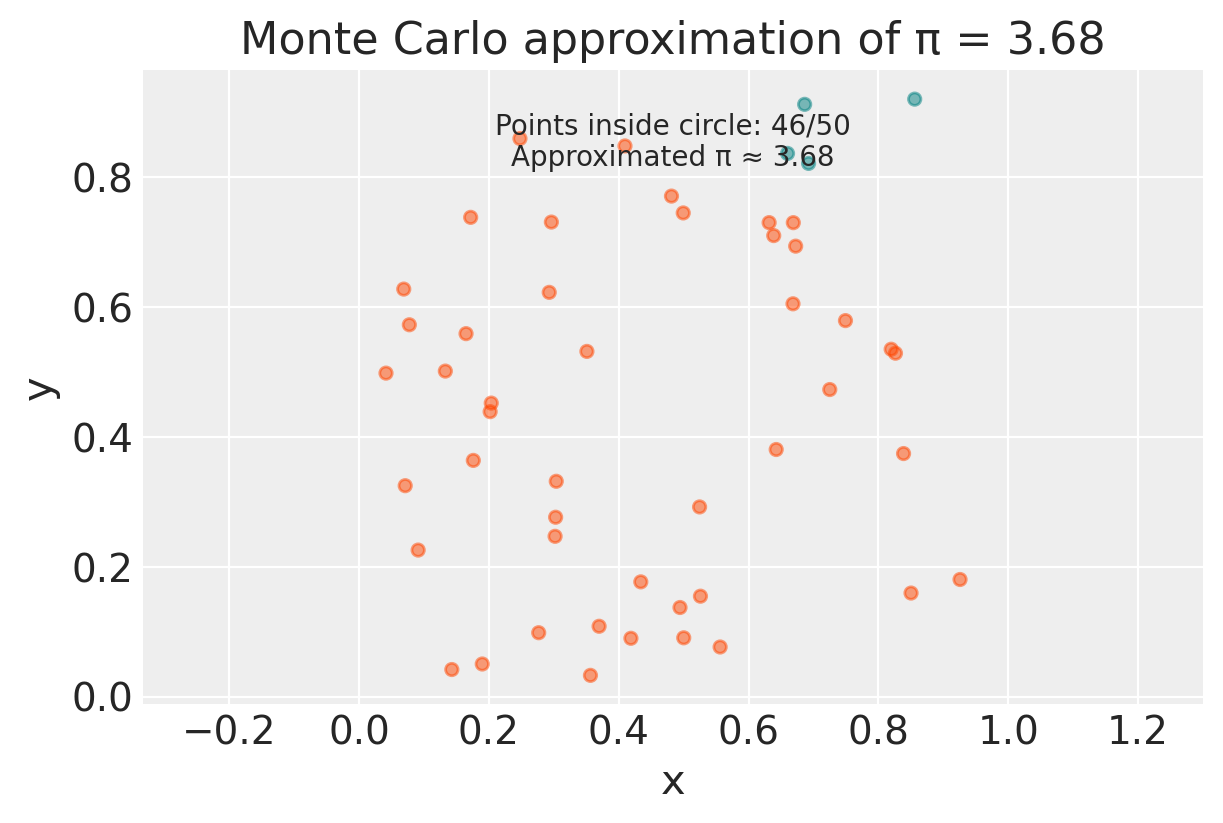

Estimated value of Pi with 50 points: 3.68


In [5]:
# Example usage
radius = 1
num_points = 50
estimated_pi = approx_pi(radius, num_points)
print(f"Estimated value of Pi with {num_points} points: {estimated_pi}")

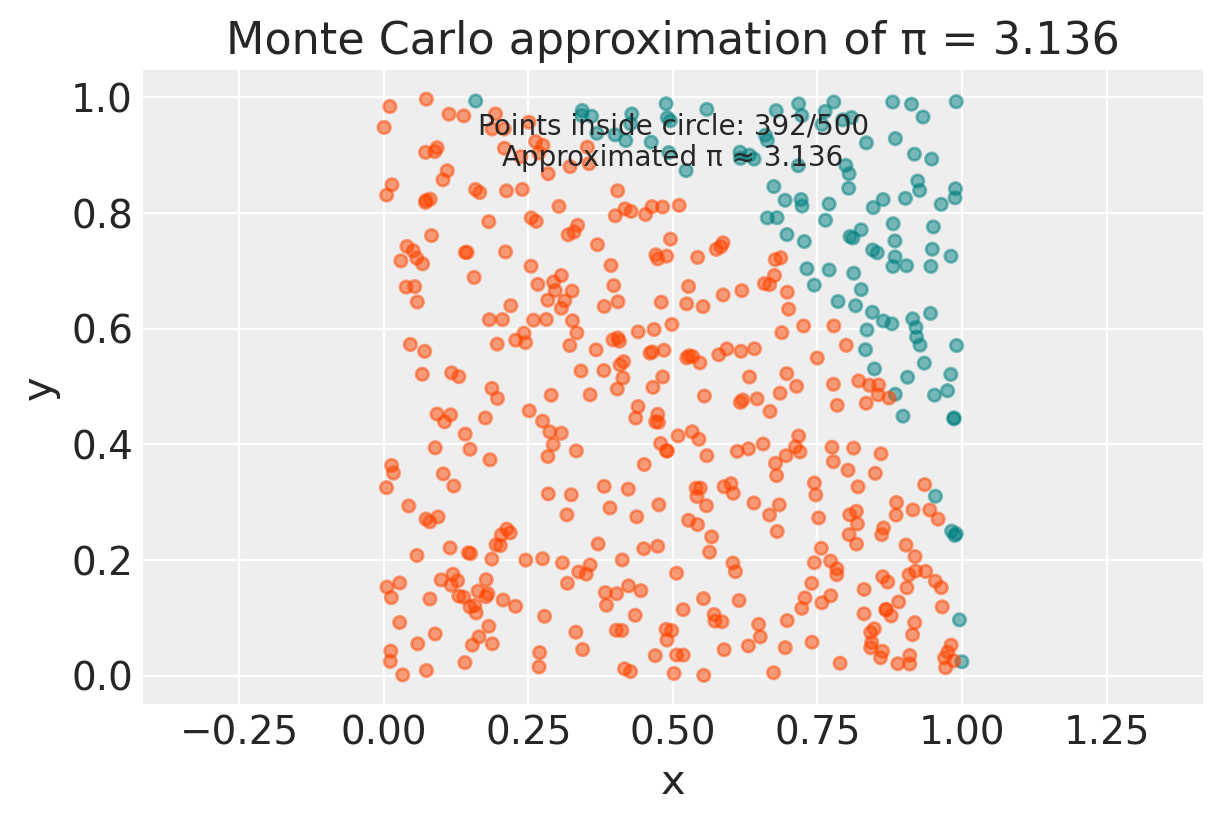

Estimated value of Pi with 500 points: 3.136


In [6]:
# Example usage
num_points = 500
estimated_pi = approx_pi(radius, num_points)
print(f"Estimated value of Pi with {num_points} points: {estimated_pi}")

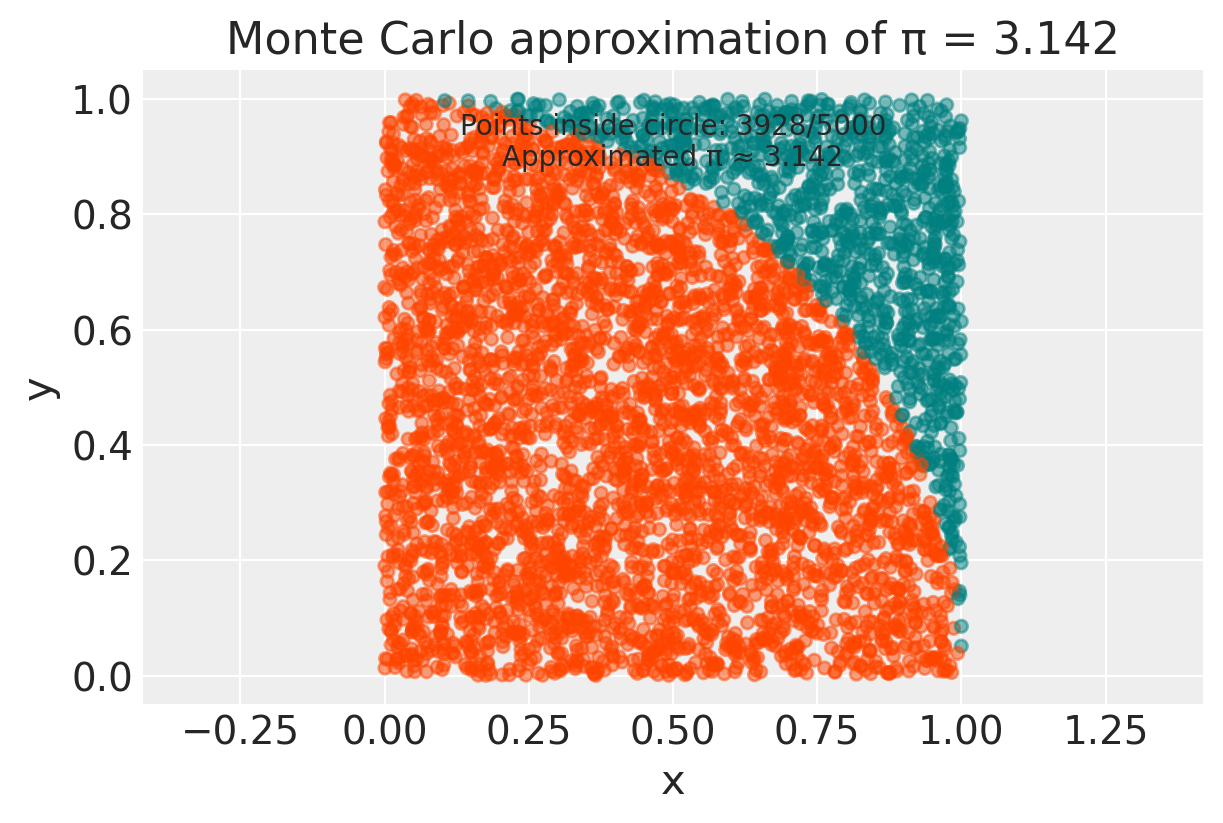

Estimated value of Pi with 5000 points: 3.142


In [7]:
# Example usage
num_points = 5000
estimated_pi = approx_pi(radius, num_points)
print(f"Estimated value of Pi with {num_points} points: {estimated_pi}")

Il metodo Monte Carlo sfrutta la legge dei grandi numeri. La legge dei grandi numeri ci dice che, all'aumentare del numero di lanci (o di punti generati nel nostro caso), la proporzione di dardi che cadono nel cerchio si avvicina sempre di più alla proporzione tra le aree. Quindi, più punti generiamo, più precisa sarà la nostra stima di π.

In conclusione, abbiamo visto come, simulando un esperimento casuale, possiamo ottenere una stima approssimata di un valore preciso come π. Questo è solo un esempio delle potenzialità del metodo Monte Carlo, che trova applicazione in molti campi della scienza, inclusa la psicologia.

### Codice Stan

Eseguiamo ora la simulazione usando Stan.

```stan
generated quantities {
  real<lower=-1, upper=1> x = uniform_rng(-1, 1);
  real<lower=-1, upper=1> y = uniform_rng(-1, 1);
  int<lower=0, upper=1> inside = x^2 + y^2 < 1;
  real<lower=0, upper=4> pi = 4 * inside;
}
```

1. **Variabili `x` e `y`**:
    - Vengono generate casualmente e uniformemente nell'intervallo $(-1, 1)$. Questo significa che stiamo campionando punti all'interno di un quadrato di lato 2 centrato sull'origine.

2. **Variabile `inside`**:
    - È un indicatore che verifica se il punto $(x, y)$ cade all'interno del cerchio unitario. La condizione $x^2 + y^2 < 1$ è vera se il punto $(x, y)$ è all'interno del cerchio di raggio 1 centrato sull'origine, e falsa altrimenti.
    - Se la condizione è vera, `inside` è impostato a 1, altrimenti a 0.

3. **Variabile `pi`**:
    - `pi` viene calcolata come 4 volte il valore di `inside`.

Il programma Stan genera punti casuali, verifica se cadono all'interno del cerchio e usa la proporzione di punti che cadono all'interno del cerchio per stimare $\pi$. Moltiplicando il valore indicatore per 4, otteniamo una stima di $\pi$ basata su ciascun punto generato. La stima finale di $\pi$ sarà la media di queste stime su molti punti campionati.

### Media Campionaria dell'Indicatore

Dopo aver generato un numero sufficiente di punti casuali e aver verificato quanti di essi cadono all'interno del cerchio, calcoliamo la media campionaria dell'indicatore `inside`. Questo indicatore è uguale a 1 se il punto è dentro il cerchio e a 0 se è fuori. La media di questi valori ci dà la proporzione dei punti che cadono dentro il cerchio.

Questa proporzione è una stima della probabilità che un punto casuale sia all'interno del cerchio. Moltiplicando questa proporzione per 4, otteniamo una stima di $\pi$.

Matematicamente, possiamo scrivere questo processo come segue:

$$
\mathbb{E}[4 \cdot \textrm{I}(\sqrt{X^2 + Y^2} \leq 1)] = \int_{-1}^1 \int_{-1}^1 4 \cdot \textrm{I}(x^2 + y^2 < 1) \, \textrm{d}x \, \textrm{d}y = \pi,
$$

dove $\textrm{I}()$ è l'indicatore che ritorna 1 se il suo argomento è vero e 0 altrimenti.

In altre parole, stiamo calcolando l'aspettativa di 4 volte l'indicatore che un punto casuale $(x, y)$ cade dentro il cerchio unitario. Questo valore atteso è uguale a $\pi$, il che ci permette di stimare $\pi$ usando i metodi Monte Carlo.

### Compilazione e Campionamento

Compiliamo e poi campioniamo dal modello, prendendo un campione di dimensione $M = 10,000$ estrazioni.

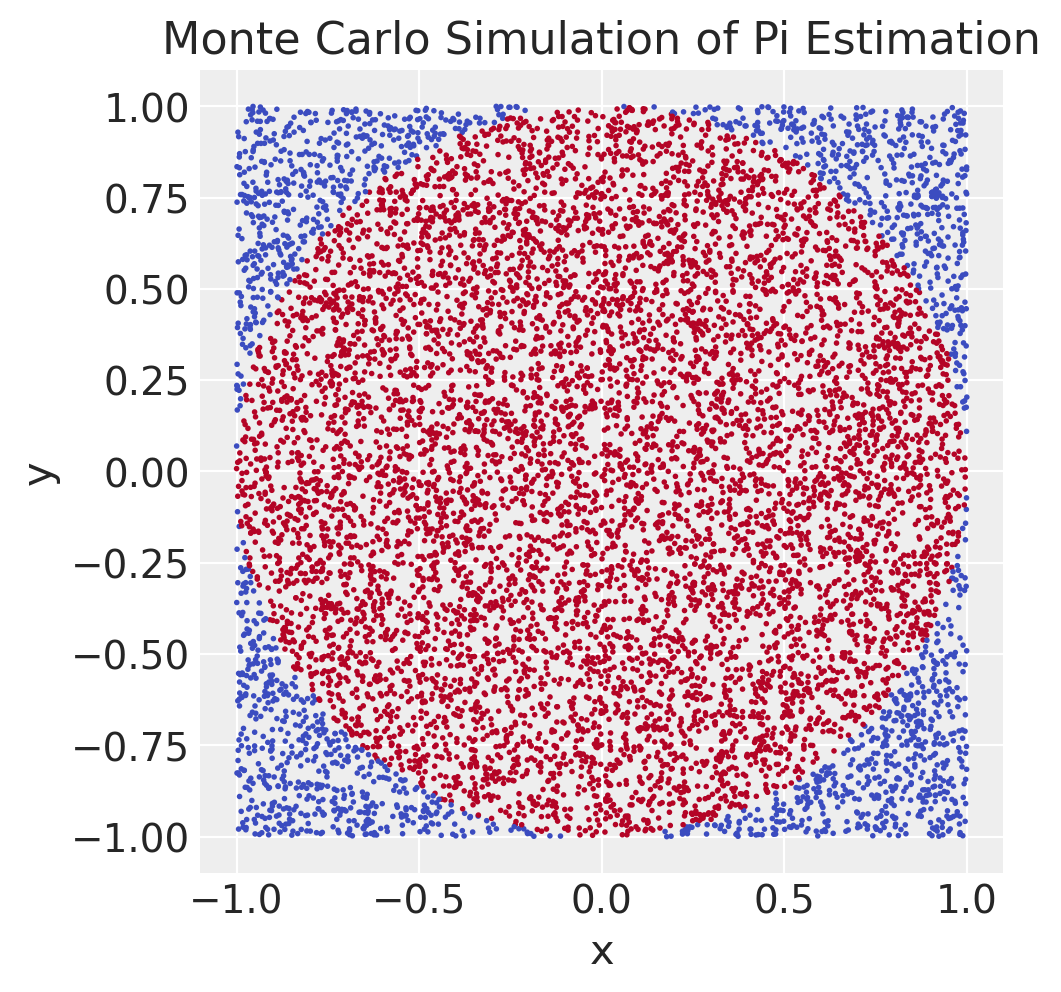

In [8]:
M = 10_000
model = CmdStanModel(stan_file="../../stan/monte-carlo-pi.stan")

sample = model.sample(
    chains=1,
    iter_warmup=1,
    iter_sampling=M,
    show_progress=False,
    show_console=False,
    seed=123,
)

x_draws = sample.stan_variable("x")
y_draws = sample.stan_variable("y")
inside_draws = sample.stan_variable("inside")
pi_draws = sample.stan_variable("pi")

df = pd.DataFrame({"N": 1000, "x": x_draws, "y": y_draws, "inside": inside_draws})

plt.figure(figsize=(5, 5))
plt.scatter(df["x"], df["y"], c=df["inside"], cmap="coolwarm", s=1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Monte Carlo Simulation of Pi Estimation")
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

Successivamente, calcoliamo la media campionaria dell'indicatore dentro-il-cerchio, che produce una stima della probabilità che un punto sia dentro il cerchio:

In [9]:
Pr_is_inside = np.mean(inside_draws)
pi_hat = np.mean(pi_draws)
print(f"Pr[Y is inside circle] = {Pr_is_inside:.3f};")
print(f"estimate for pi = {pi_hat:.3f}")

Pr[Y is inside circle] = 0.786;
estimate for pi = 3.144


Il valore esatto di $\pi$ fino a tre cifre decimali è $3.142$. Con il nostro metodo, ci avviciniamo a questo valore, ma non lo raggiungiamo esattamente, il che è tipico dei metodi Monte Carlo. Aumentando il numero di estrazioni, l'errore diminuisce. Teoricamente, con un numero sufficiente di estrazioni, possiamo ottenere qualsiasi precisione desiderata; tuttavia, in pratica, dobbiamo accontentarci di pochi decimali di accuratezza nelle nostre stime Monte Carlo. Questo di solito non è un problema, poiché l'incertezza statistica tende a dominare rispetto all'imprecisione numerica nella maggior parte delle applicazioni.

## Integrazione di Monte Carlo

Immaginiamo di voler calcolare il valore atteso (la media) di una quantità che dipende da un parametro incerto, come la media di una popolazione. Se la distribuzione di probabilità di questo parametro è complessa o non ha una forma analitica semplice, calcolare l'integrale necessario per ottenere il valore atteso può essere molto difficile, se non impossibile.

L'integrazione di Monte Carlo offre un'alternativa elegante a questo problema. Invece di calcolare l'integrale analiticamente, generiamo un gran numero di campioni casuali dal parametro di interesse, ognuno dei quali rappresenta una possibile realizzazione del parametro. Quindi, calcoliamo la media di questi campioni per ottenere una stima del valore atteso.

Formalmente, supponiamo di voler calcolare il valore atteso posteriore di un parametro $\theta$ dato i dati osservati $x$:

$$
\mathbb{E}(\theta |x) = \int \theta p(\theta|x)d\theta ,
$$

dove $p(\theta \mid x)$ è la distribuzione di probabilità posteriore di $\theta$.

L'integrazione di Monte Carlo ci permette di stimare questo valore atteso come:

$$
\hat{\mathbb{E}} (\theta |x) = \frac{1}{M} \sum_{m=1}^M \theta^{(m)}, \quad \theta^{(m)} \sim p(\theta|x).
$$

In altre parole, generiamo $M$ campioni $\theta^{(1)}, ..., \theta^{(M)}$ dalla distribuzione posteriore e calcoliamo la media aritmetica di questi campioni.

L'integrazione di Monte Carlo non si limita al calcolo del valore atteso. Possiamo utilizzarla per calcolare il valore atteso di qualsiasi funzione $g(\theta)$:

$$
\hat{\mathbb{E}} (g(\theta |x)) = \frac{1}{M} \sum_{m=1}^M g(\theta^{(m)}), \quad \theta^{(m)} \sim p(\theta \mid x).
$$

La funzione $g(\theta)$ è detta **ordinabile** perché possiamo calcolare il suo valore per ogni campione $\theta^{(m)}$ e poi ordinare i risultati. 

Ad esempio, supponiamo di voler stimare la varianza posteriore di $\theta$. La varianza è definita come:

```
Var(\theta|x) = E[(\theta - E[\theta|x])^2 | x]
```

Possiamo riscrivere questa espressione come:

```
Var(\theta|x) = E[g(\theta) | x]
```

dove $g(\theta) = (\theta - E[\theta|x])^2$. La funzione $g(\theta)$ è ordinabile: possiamo calcolare $g(\theta^{(1)})$, $g(\theta^{(2)})$, ..., $g(\theta^{(M)})$ e poi calcolarne la media per ottenere una stima della varianza.

**Perché è utile?**

L'integrazione di Monte Carlo è uno strumento estremamente versatile perché ci permette di:

* **Calcolare valori attesi:** Di qualsiasi funzione della variabile casuale di interesse.
* **Stimare quantili:** Come la mediana, i quartili, ecc.
* **Calcolare probabilità:** Ad esempio, la probabilità che un parametro cada in un certo intervallo.

In sintesi, l'integrazione di Monte Carlo è un metodo numerico potente per affrontare problemi di inferenza bayesiana quando le soluzioni analitiche sono difficili da ottenere. Grazie alla sua flessibilità, è ampiamente utilizzata in molti campi, inclusa la psicologia.

## Importance Sampling

Il metodo che abbiamo discusso in precedenza si chiama *naive* Monte Carlo. Produce la risposta corretta, ma è molto inefficiente. Il metodo naive Monte Carlo genera punti casuali uniformemente all'interno di una regione. Tuttavia, in molti casi, siamo interessati a stimare grandezze relative a regioni dello spazio dei parametri dove la densità di probabilità è bassa. In queste situazioni, generando punti uniformemente, molti di essi cadranno in regioni che non ci interessano, riducendo l'efficienza della stima.

L'*importance sampling* è una tecnica che permette di concentrare i campioni nelle regioni dello spazio dei parametri che sono più rilevanti per la stima che vogliamo ottenere. Invece di campionare da una distribuzione uniforme, si campiona da una distribuzione proposta, che dovrebbe essere scelta in modo da assegnare una probabilità maggiore alle regioni di interesse.

### Come Dunziona in Pratica?

- Scegli una distribuzione proposta: Questa distribuzione dovrebbe essere simile alla distribuzione della quantità che si vuole stimare, ma più facile da campionare.
- Campiona: Genera punti casuali dalla distribuzione proposta.
- Correggi il peso: Ogni punto campionato viene pesato in base al rapporto tra la densità della distribuzione target (quella che vogliamo stimare) e la densità della distribuzione proposta nel punto campionato.
- Calcola la stima: La stima finale viene ottenuta come media pesata dei valori della funzione da stimare nei punti campionati.

**Vantaggi dell'importance sampling:**

- Maggiore efficienza: Concentrando i campioni nelle regioni importanti, si riducono le varianze delle stime e si ottengono risultati più accurati con un numero minore di simulazioni.
- Flessibilità: Può essere applicato a una vasta gamma di problemi.
- Adattabilità: La distribuzione proposta può essere adattata durante la simulazione per migliorare ulteriormente l'efficienza.

**Svantaggi dell'importance sampling:**

- Scelta della distribuzione proposta: Una cattiva scelta della distribuzione proposta può portare a una stima peggiore.
- Calcolo dei pesi: Il calcolo dei pesi può essere computazionalmente costoso.

In conclusione, l'importance sampling è una tecnica usata per migliorare l'efficienza delle simulazioni Monte Carlo. 